# Part 1, exploratory data analysis (EDA)

### About Dataset
Overview
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

### Вопросы:

1. [1 балл] Загрузка данных - загрузите датасет, посмотрите на его `head` и `tail` и воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T()`
2. [1 балл] Сколько в среднем арендуется велосипедов в час? (целевая переменная - `cnt`)
3. [1 балл] Какова медианная влажность воздуха?
4. [2 балла] Какова доля часов, в которые арендовалось больше 500 велосипедов? Влажность была меньше 0.8?
5. [1 балл] Визуализация - Постройте гистограммы всех переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какие два фактора наиболее сильно **отрицательно** влияют на число арендованных велосипедов?
7. [3 балла] Группировка + Визуализация - для каждой из переменных "час", "день недели" и "месяц" посчитайте среднее число арендуемых велосипедов при помощи метода `groupby`. Добавьте к коду `.plot()` для  построения графика средних. 

## Итого - 10 баллов, отличная работа!

### Комментарий  к решению
Всё верно, круто, что указали питону на первый столбец, как на индекс!

In [1]:
## Первый пункт:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Bike = pd.read_csv('Asadullin_Amir_bike_sharing.csv')

In [4]:
Bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
Bike = pd.read_csv('Asadullin_Amir_bike_sharing.csv', index_col = 0)
Bike

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [6]:
Bike.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
Bike.tail(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [8]:
Bike.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Комментарий  к решению
И снова всё верно!

In [9]:
## Второй пункт:

In [10]:
print ('Среднее арендуемое число велосипедов в час','=',Bike.hr.mean())

Среднее арендуемое число велосипедов в час = 11.546751826917545


### Комментарий  к решению
И здесь тоже :) 

In [11]:
## Третий пункт:

In [12]:
print('медианная влажность воздуха','=',Bike.hum.median()) 

медианная влажность воздуха = 0.63


### Комментарий  к решению
Всё верно, единственное уточнение - лучше не использовать слова, которые питон подсвечивает зелёным, в качестве названий переменных, так как эти слова, на самом деле, встроенные функции, как int, float и прочие. Вы использовали all, который позволяет работать с булевыми переменными (если интересно, можете посмотреть, что именно он делает), и переопределили его как новую переменную, в результате чего встроенная функция прекратила своё никчемное существование :) 

In [13]:
## Четвертый пункт:

In [14]:
part =int(Bike.loc[:,['hr']][(Bike.hum <0.8)&(Bike.cnt>500)].count())
all = int(Bike.loc[:,['hr']].count())
share = float(part/all*100)
print('Доля часов= ',share,' %',sep ='')

Доля часов= 6.858852638241555 %


### Комментарий  к решению
И тут всё хорошо

In [15]:
## Пятый пункт:

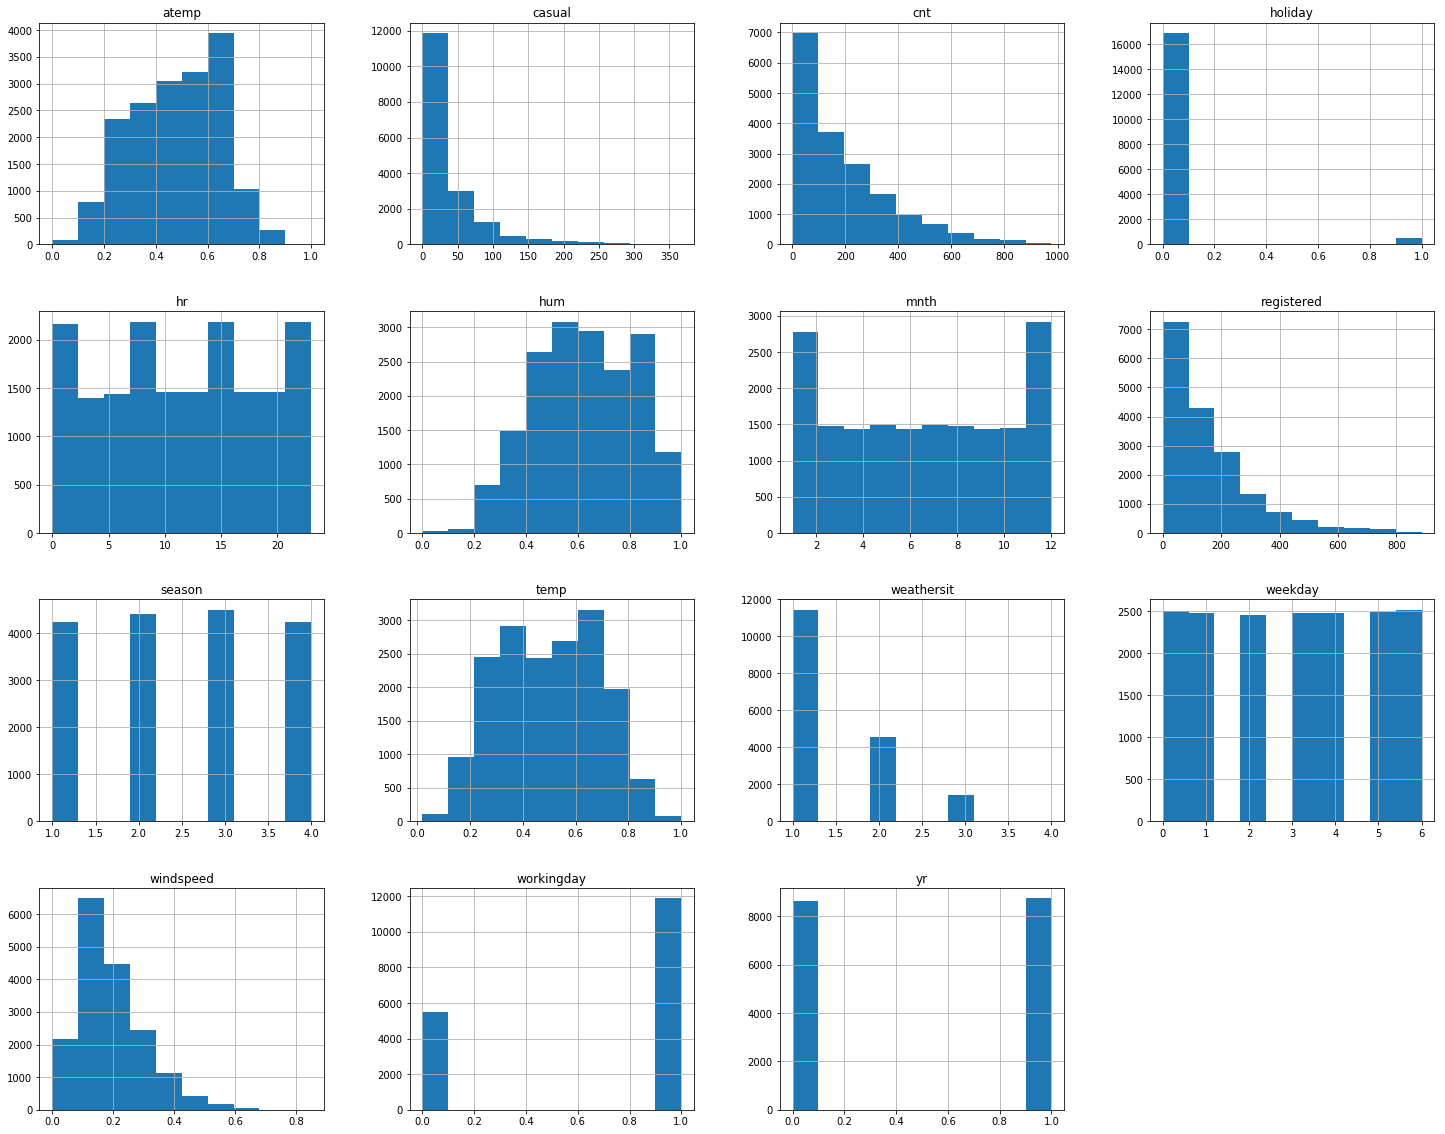

In [16]:
Bike.hist(figsize=(25, 20));


### Комментарий  к решению
Отличное объяснение корреляции! (Здесь, правда, целевая переменная, как и большинство остальных переменных, являются непрерывными, поэтому можно использовать корреляцию Пирсона, которая считается по умолчанию). Сама по себе корреляция не говорит о том, действительно ли одна переменная влияет на другую, она лишь показывает величину связи между величиными, но вот если удаётся эту связь логично объяснить, скорее всего - что-то там действительно есть :)

In [17]:
## Шестой пункт:

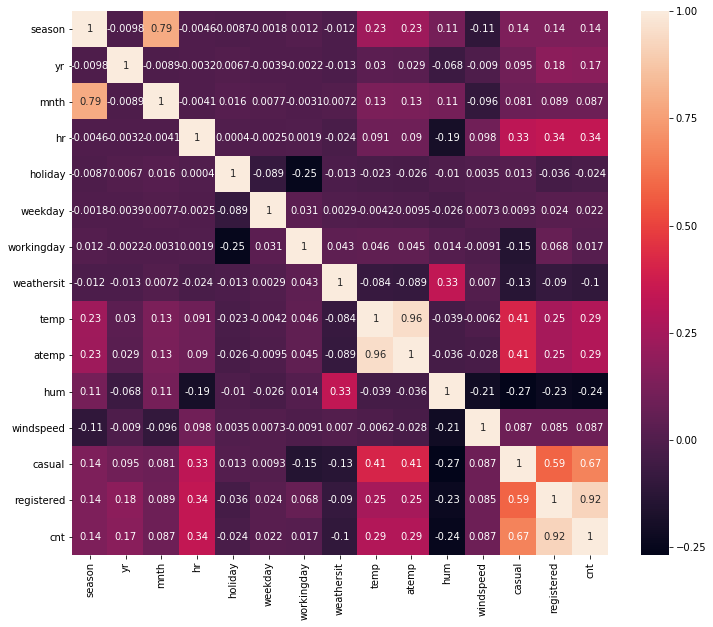

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(Bike.corr('kendall'), annot=True);

На количество велосипедов отрицательно влияет влажность воздуха (мы можем предположить, что чем больше влажность воздуха, тем большая вероятность дождливой погоды) и плохая погода (так как в данном data frame чем хуже погода, тем выше коэфицент в таблице, поэтому корреляция в данном случае отрицательна). Можно сказать, что плохая погода- это основной фактор, отрицательно влияющий на количество арендуемых велосипедов.


### Комментарий  к решению
Очень хорошо!

In [20]:
## Седьмой Пункт:

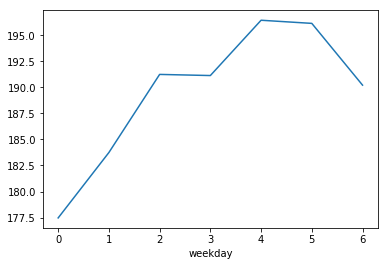

In [21]:
Bike.groupby('weekday').cnt.mean().plot()

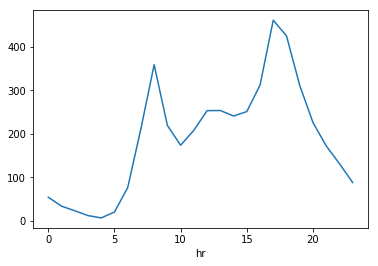

In [22]:
Bike.groupby('hr').cnt.mean().plot()

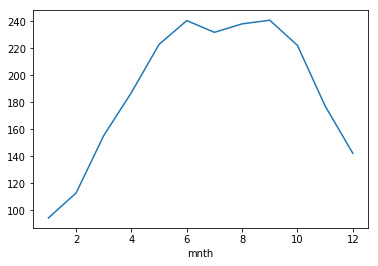

In [23]:
Bike.groupby('mnth').cnt.mean().plot()

In [24]:
## The end?